# Завдання 2

Напишіть програму, яка використовує алгоритми DFS і BFS для знаходження шляхів у графі, який було розроблено у першому завданні.

Далі порівняйте результати виконання обох алгоритмів для цього графа, висвітлить різницю в отриманих шляхах. Поясніть, чому шляхи для алгоритмів саме такі.

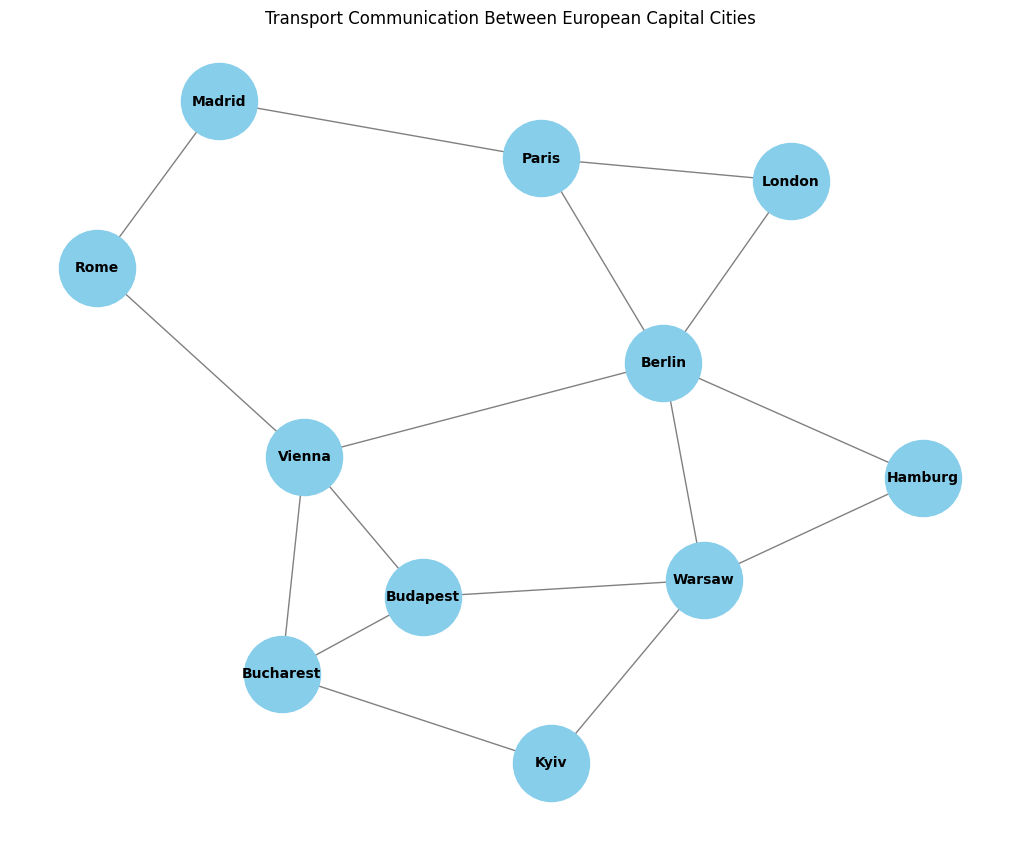

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

cities = [
    "London", "Berlin", "Madrid", "Rome", 
    "Paris", "Bucharest", "Vienna", 
    "Hamburg", "Warsaw", "Budapest", "Kyiv"
]

G = nx.Graph()

for city in cities:
    G.add_node(city)
    
edges = [
    ("London", "Paris"),
    ("London", "Berlin"),
    ("Paris", "Berlin"),
    ("Paris", "Madrid"),
    ("Berlin", "Vienna"),
    ("Berlin", "Warsaw"),
    ("Madrid", "Rome"),
    ("Rome", "Vienna"),
    ("Vienna", "Budapest"),
    ("Vienna", "Bucharest"),
    ("Hamburg", "Berlin"),
    ("Hamburg", "Warsaw"),
    ("Warsaw", "Budapest"),
    ("Budapest", "Bucharest"),
    ("Kyiv", "Warsaw"),
    ("Kyiv", "Bucharest")
]

G.add_edges_from(edges)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Transport Communication Between European Capital Cities")
plt.show()

In [9]:

graph_as_list = {
    "London": ["Paris", "Berlin"],
    "Berlin": ["London", "Paris", "Vienna", "Warsaw", "Hamburg"],
    "Paris": ["London", "Berlin", "Madrid"],
    "Madrid": ["Paris", "Rome"],
    "Rome": ["Madrid", "Vienna"],
    "Vienna": ["Berlin", "Rome", "Budapest", "Bucharest"],
    "Bucharest": ["Vienna", "Budapest", "Kyiv"],
    "Hamburg": ["Berlin", "Warsaw"],
    "Warsaw": ["Berlin", "Hamburg", "Budapest", "Kyiv"],
    "Budapest": ["Vienna", "Warsaw", "Bucharest"],
    "Kyiv": ["Warsaw", "Bucharest"]
}

### Ітеративний пошук BFS

In [16]:
from collections import deque

def bfs_iterative(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            print(vertex, end="-->")
            visited.add(vertex)
            queue.extend(set(graph[vertex]) - visited)

bfs_iterative(graph_as_list, 'Madrid')


Madrid-->Rome-->Paris-->Vienna-->London-->Berlin-->Budapest-->Bucharest-->Warsaw-->Hamburg-->Kyiv-->

### Рекурсивний пошук DFS 

In [18]:
def dfs_recursive(graph, vertex, visited=None):
    if visited is None:
        visited = set()
    visited.add(vertex)
    print(vertex, end='-->') 
    for neighbor in graph[vertex]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)

dfs_recursive(graph_as_list, 'Madrid')

Madrid-->Paris-->London-->Berlin-->Vienna-->Rome-->Budapest-->Warsaw-->Hamburg-->Kyiv-->Bucharest-->

# Висновки

Пошук BFS - проходить всі вершини на одному рівні зліва направо, потім рухається на нижчі рівні. Тому виглядає так, що вершини відвідуються ніби-то по ширині графа, рівень за рівнем.

Пошук DFS - після відвідання певної вершини, шукає сусідню вершину та, якщо вона ще не відвідана, то рухається до неї. Тому маршрут на заданому графі виглядає більш хаотично.